# Mexican Drug Wars

## [Download worked project](../../_static/generated/mexican-drug-wars-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/mexican-drug-wars)

Drug cartels carried out a shocking wave of lethal attacks against hundreds of local elected officials and party candidates in Mexico during years 2007-2012, attempting to establish criminal governance regimes and conquer local governments, populations, and territories. This quickly forced Mexican authorities to deploy armored vehicles with heavy weapons to perform military operations within their own borders. You will analyze cartels attacks frequency and where they occurred.

![expected-plot-preview.png](expected-plot-16.png)

Data sources:

- Trejo, Guillermo; Ley, Sandra, 2019, "Replication Data for: High-Profile Criminal Violence. Why Drug Cartels Murder Government Officials and Party Candidates in Mexico", https://doi.org/10.7910/DVN/VIXNNE, Harvard Dataverse, V1, UNF:6:BcqInKD9NBX3NkI48CdqpQ== [fileUNF]  License: CC0 - "Public Domain Dedication" 

- Coscia, Michele and Viridiana Rios (2012). Knowing Where and How Criminal Organizations Operate Using Web Content. CIKM, 12 (October – November). https://www.michelecoscia.com/?page_id=1032

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
bus-speed-prj
    mexican-drug-wars.ipynb
    mexican-drug-wars-sol.ipynb
    
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `mexican-drug-wars.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## Election attacks dataset

In the file [Dataset_HighProfileCriminalViolence.tab](Dataset_HighProfileCriminalViolence.tab)
are listed the number of attacks occurred to elected officials in Mexico from years 2007 to 2012. Focus only on columns `cve_inegi`, `state`, `year`,  `aggr_sum`, `elect_local`:

,cve_inegi,state,year,aggr_sum,elect_local
2278,12031,Guerrero,2012,2,1.0
2279,12032,Guerrero,2007,0,0.0
2280,12032,Guerrero,2008,0,1.0
2281,12032,Guerrero,2009,1,0.0


* Municipalities where the attack occurred are identified by a 5 digits `cve_inegi` code: first two digits indicate the state, 3 last ones the town. **NOTE**: first file entries only have 4 digits as the leading zero is implied, take care of this case
* `aggr_sum`: number of attacks occurred in a particular municipality / year.
* `elect_local`: `1.0` if a **local** election occurred in the year of the attack (ignore other `elect_*`)

## 1. load_mexico

Extract Mexican state codes, names, the counts of attacks, and the years when **local** elections occurred, and RETURN a dictionary of dictionaries mapping **two digit** state codes **as strings** to the extracted info.

* use `csv.DictReader` with `delimiter='\t'` and `utf8` encoding (municipalities will look weird but we don't use them)
* use exactly 6 cells for `attacks` lists: assume all were carried out between `2007`and `2012` included
* **DO NOT** assume the years in rows repeat with a pattern, for example municipality `21132` has two successive 2012 years!

**Example EXERPT** (note keys order doesn't matter, complete expected output can be found in [expected_mexico_db.py](expected_mexico_db.py))

```python
>>> load('Dataset_HighProfileCriminalViolence.tab')

{
  '08': {
              'attacks': [0, 5, 7, 12, 7, 2],
              'local_election_years': [2007, 2010],
              'state_code': '08',
              'state_name': 'Chihuahua'
             }
  '12': {
              'attacks': [4, 11, 11, 9, 3, 10],
              'local_election_years': [2008, 2011, 2012],
              'state_code': '12',
              'state_name': 'Guerrero'
             }
  .
  .
  .
}
```

In [2]:

import csv

def load(filename):
    
    
    with open(filename, encoding='utf8', newline='') as csvfile_in:
        my_reader = csv.DictReader(csvfile_in, delimiter='\t')

        ret = {}

        for d in my_reader:
            if len(d['cve_inegi']) == 4:
                inegi = '0' + d['cve_inegi']
            else:
                inegi = d['cve_inegi']
                
            state_code = inegi[:2]
            
            if not state_code in ret:
                ret[state_code] = {'attacks':[0]*6,
                                   'local_election_years' : [],
                                   'state_name': '',
                                   'state_code': state_code}
            rd = ret[state_code]            
            year = int(d['year'])                         
            rd['state_code'] = state_code
            rd['state_name'] = d['state']            
            rd['attacks'][year - 2007] += int(d['aggr_sum'])
            
            if d['elect_local'] == '1.0':  
                if year not in rd['local_election_years']:
                    rd['local_election_years'].append(year)
    
    for rd in ret:        
        ret[rd]['local_election_years'].sort()
                    
    return ret
    

mexico_db = load('Dataset_HighProfileCriminalViolence.tab')
mexico_db


In [2]:

import csv

def load(filename):
    raise Exception('TODO IMPLEMENT ME !')

mexico_db = load('Dataset_HighProfileCriminalViolence.tab')
mexico_db


In [4]:
# TESTING
from pprint import pformat; from expected_mexico_db import expected_mexico_db
for sid in expected_mexico_db.keys():
    if sid not in mexico_db: print('\nERROR: MISSING state', sid); break    
    for k in expected_mexico_db[sid]:
        if k not in mexico_db[sid]:
            print('\nERROR at state', sid,'\n\n   MISSING key:', k); break    
        if expected_mexico_db[sid][k] != mexico_db[sid][k]:
            print('\nERROR at state', sid, 'key:',k)
            print('  ACTUAL:\n', pformat(mexico_db[sid][k]))
            print('  EXPECTED:\n', pformat(expected_mexico_db[sid][k]))
            break
if len(mexico_db) > len(expected_mexico_db):
    print('ERROR! There are more states than expected!')
    print('  ACTUAL:\n', len(mexico_db))
    print('  EXPECTED:\n', len(expected_mexico_db))

## 2. show_attacks

Given a `state_code` and , display a chart of the attack counts over the years. 

- normalize the height so to have all charts as high as the maximum possible attack count in the db
- show vertical dashed lines in proximity of election years (use `linestyle='dashed'`), using the same color
- you are allowed to use constants for years
- **make sure vertical lines on borders are clearly visible** and separated from borders by setting proper limits
- **remember** to also print the maximum possible attack count in the db

**Examples**:

```
>>> show_attacks('12', mexico_db)  
max attacks happened in any state: 39
```
![expected-plot-12.png](expected-plot-12.png)

```
>>> show_attacks('16', mexico_db)  
max attacks happened in any state: 39
```
![expected-plot-16.png](expected-plot-16.png)

max attacks happened in any state: 39


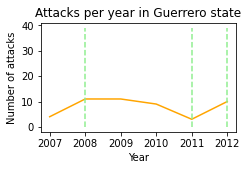

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt

def show_attacks(state_code, mexdb):
    
   
    attacks = mexdb[state_code]['attacks']        
    
    plt.figure(figsize=(3.5,2))
    maxy = 0
    for s in mexdb:
        maxy = max(maxy, max(mexdb[s]['attacks']))
            
    print("max attacks happened in any state:", maxy)  
        
    xs = range(2007, 2013)
    ys = mexdb[state_code]['attacks']
    
    plt.plot(xs, ys, color='orange')

    plt.title("Attacks per year in %s state" % mexdb[state_code]['state_name'])
    plt.xlabel('Year')
    plt.ylabel('Number of attacks')
    
    for year in mexdb[state_code]['local_election_years']:
        plt.plot([year, year], [0, maxy], color='lightgreen', linestyle='dashed')
    
    plt.savefig('expected-plot-%s.png' % state_code)
    plt.show()
    

show_attacks('12', mexico_db)  # Guerrero

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt

def show_attacks(state_code, mexdb):
    raise Exception('TODO IMPLEMENT ME !')

show_attacks('12', mexico_db)  # Guerrero

max attacks happened in any state: 39


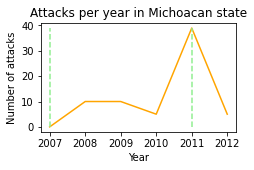

In [6]:
show_attacks('16', mexico_db)   # Michoacan

## 3. Cartels

The file [CosciaRios2012_DataBase.csv](CosciaRios2012_DataBase.csv) lists attacks performed by criminal organizations (cartels) in various years. For each row, the columns from 3-12 have a `1` if the corresponding cartel named in the header was involved in the attack, and `0` otherwise. Example:

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
17,1001,1,2007,0,0,1,0,0,0,0,0,1,0
18,1001,1,2008,0,0,1,0,1,0,0,0,0,0
19,1001,1,2009,0,0,1,1,0,1,0,0,1,0


Write a function which given a `filename` and a `year`, processes the dataset and RETURN a dictionary mapping cartel names to a list of **sorted** states (no duplicates) where the cartel performed attacks in the given `year`. 

- use a `csv.reader` with `utf8` encoding
- pick state code from `State` column and state names from previous `mexico_db` (you only need names) - if missing put state code (i.e. `09`)
- **NOTE**: `Sinaloa` is a special case, since it is both a state and a cartel.

**Example**:
    
```python
>>> cartels('CosciaRios2012_DataBase.csv', mexico_db, 2003)

{
 'Beltran_Leyva': ['Colima', 'Morelos', 'Sinaloa'],
 'Beltran_Leyva_Family': [],
 'Familia': [],
 'Golfo': ['Campeche',   'Chihuahua',       'Coahuila',   'Durango',  'Mexico', 
           'Nuevo Leon', 'San Luis Potosi', 'Tamaulipas', 'Veracruz', 'Yucatan'],
 'Juarez': ['Baja California', 'Chihuahua', 'Coahuila', 'Colima', 
            'Durango', 'Guerrero', 'Jalisco', 'Sinaloa', 'Tamaulipas'],
 'Otros': ['Veracruz'],
 'Sinaloa': ['Chiapas', 'Colima',     'Jalisco', 'Mexico', 
             'Nayarit', 'Nuevo Leon', 'Sinaloa', 'Sonora', 'Tamaulipas'],
 'Sinaloa_Family': ['Guerrero'],
 'Tijuana': ['Aguascalientes', 'Baja California', 'Chiapas',   'Chihuahua', 'Coahuila', 'Guerrero',
             'Jalisco',         'Mexico',         'Michoacan', 'Nuevo Leon', 'Puebla',  'Sinaloa',
             'Sonora'],
 'Zetas': ['Campeche',   'Guanajuato', 'Jalisco',    'Mexico', 
           'Nuevo Leon', 'Sinaloa',    'Tamaulipas', 'Veracruz', 'Yucatan']
}
```

In [8]:

import csv
def cartels(filename, mexdb, year):
    
               
    
    work = {}
        
    with open(filename, encoding='utf8', newline='') as csvfile_in:
        my_reader = csv.reader(csvfile_in, delimiter=',')
        
        header = next(my_reader)
        
        for cartel_name in header[3:]:
            work[cartel_name] = set()
                         
        for row in my_reader:            
            row_year = int(row[2])
            if row_year == year:
                inegi = row[0]            
                if len(row[1]) == 1:
                    state_code = '0' + row[1]
                else:
                    state_code = row[1]                                                                        
                if state_code in mexdb:
                    state_name = mexdb[state_code]['state_name']
                else:
                    state_name = state_code

                for j in range(3,len(row)):
                    if row[j] == '1':
                        org_name = header[j]                            
                        work[org_name].add(state_name)
                                        
        ret = {}
        for k,v in work.items():
            ret[k] = sorted(v)
        return ret
    
       
cartels2003 = cartels('CosciaRios2012_DataBase.csv', mexico_db, 2003)
from pprint import pprint
pprint(cartels2003, width=190)

assert cartels2003['Beltran_Leyva'] == ['Colima', 'Morelos', 'Sinaloa']
assert cartels2003['Otros'] ==  ['Veracruz']
assert cartels2003['Zetas'] ==  ['Campeche', 'Guanajuato', 'Jalisco', 'Mexico', 'Nuevo Leon', 'Sinaloa', 'Tamaulipas', 'Veracruz', 'Yucatan']

{'Beltran_Leyva': ['Colima', 'Morelos', 'Sinaloa'],
 'Beltran_Leyva_Family': [],
 'Familia': [],
 'Golfo': ['Campeche', 'Chihuahua', 'Coahuila', 'Durango', 'Mexico', 'Nuevo Leon', 'San Luis Potosi', 'Tamaulipas', 'Veracruz', 'Yucatan'],
 'Juarez': ['Baja California', 'Chihuahua', 'Coahuila', 'Colima', 'Durango', 'Guerrero', 'Jalisco', 'Sinaloa', 'Tamaulipas'],
 'Otros': ['Veracruz'],
 'Sinaloa': ['Chiapas', 'Colima', 'Jalisco', 'Mexico', 'Nayarit', 'Nuevo Leon', 'Sinaloa', 'Sonora', 'Tamaulipas'],
 'Sinaloa_Family': ['Guerrero'],
 'Tijuana': ['Aguascalientes', 'Baja California', 'Chiapas', 'Chihuahua', 'Coahuila', 'Guerrero', 'Jalisco', 'Mexico', 'Michoacan', 'Nuevo Leon', 'Puebla', 'Sinaloa', 'Sonora'],
 'Zetas': ['Campeche', 'Guanajuato', 'Jalisco', 'Mexico', 'Nuevo Leon', 'Sinaloa', 'Tamaulipas', 'Veracruz', 'Yucatan']}


In [8]:

import csv
def cartels(filename, mexdb, year):
    raise Exception('TODO IMPLEMENT ME !')
       
cartels2003 = cartels('CosciaRios2012_DataBase.csv', mexico_db, 2003)
from pprint import pprint
pprint(cartels2003, width=190)

assert cartels2003['Beltran_Leyva'] == ['Colima', 'Morelos', 'Sinaloa']
assert cartels2003['Otros'] ==  ['Veracruz']
assert cartels2003['Zetas'] ==  ['Campeche', 'Guanajuato', 'Jalisco', 'Mexico', 'Nuevo Leon', 'Sinaloa', 'Tamaulipas', 'Veracruz', 'Yucatan']

In [9]:
# further tests
expected2003 = {
 'Beltran_Leyva': ['Colima', 'Morelos', 'Sinaloa'],
 'Beltran_Leyva_Family':[],
 'Familia': [],
 'Golfo':   ['Campeche', 'Chihuahua', 'Coahuila', 'Durango', 'Mexico', 'Nuevo Leon', 'San Luis Potosi', 'Tamaulipas', 'Veracruz', 'Yucatan'],
 'Juarez':  ['Baja California', 'Chihuahua', 'Coahuila', 'Colima', 'Durango', 'Guerrero', 'Jalisco', 'Sinaloa', 'Tamaulipas'],
 'Otros':   ['Veracruz'],
 'Sinaloa': ['Chiapas', 'Colima', 'Jalisco', 'Mexico', 'Nayarit', 'Nuevo Leon', 'Sinaloa', 'Sonora', 'Tamaulipas'],
 'Sinaloa_Family': ['Guerrero'],
 'Tijuana': ['Aguascalientes', 'Baja California', 'Chiapas', 'Chihuahua', 'Coahuila', 'Guerrero', 'Jalisco', 'Mexico', 'Michoacan', 'Nuevo Leon', 'Puebla', 'Sinaloa', 'Sonora'],
 'Zetas':   ['Campeche', 'Guanajuato', 'Jalisco', 'Mexico', 'Nuevo Leon', 'Sinaloa', 'Tamaulipas', 'Veracruz', 'Yucatan']
}

assert cartels2003 == expected2003

expected1999 = {
    'Beltran_Leyva': [],
    'Beltran_Leyva_Family': [],
    'Familia': [],
    'Golfo':   ['Baja California', 'Guanajuato', 'Nuevo Leon', 'Puebla'],
    'Juarez':  ['Baja California', 'Chihuahua', 'Durango', 'Tamaulipas', 'Veracruz'],
    'Sinaloa': ['Jalisco', 'Veracruz'],
    'Sinaloa_Family': [],
    'Tijuana': ['Baja California', 'Campeche', 'Coahuila', 'Nuevo Leon', 'Sonora', 'Tamaulipas', 'Yucatan'],
    'Zetas':   ['Baja California', 'Mexico', 'Morelos', 'Sinaloa', 'Sonora'],
    'Otros':   []
}

cartels1999 = cartels('CosciaRios2012_DataBase.csv', mexico_db, 1999)  
assert cartels1999 == expected1999